## Day Objective
- Random Forest Classifier
- UnSupervised Machine Learning
    - K Means Clustering

### Random Forest Classifier
- Random forest is on of the Ensemble technique.
    - Ensemble techniques will create group of models and combine them produce the improved results.
- Collection of Decision tree model is called a Random Forest.
- Random forest will play key role for huge amount of dataset.

### How does Random forest works
- Step1: Selection of Random subsets are created from the dataset.
- Step2: Decision Tree model will applied for each subset.
- STep3: The final prediction is calculated by averaging the predictions from all decision tress.

In [1]:
import numpy as np
import pandas as pd

In [3]:
from sklearn.datasets import load_digits

In [4]:
digits = load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [5]:
df = pd.DataFrame(digits.data, columns = digits.feature_names)
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [6]:
df.shape

(1797, 64)

In [7]:
df.isnull().sum().sum()

0

In [8]:
df['digits'] = digits.target

In [9]:
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,digits
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [10]:
df['digits'].value_counts()

3    183
1    182
5    182
4    181
6    181
9    180
7    179
0    178
2    177
8    174
Name: digits, dtype: int64

In [11]:
len(df['digits'].value_counts())

10

In [12]:
X = df.drop(['digits'], axis = 1)
Y = df['digits']

In [13]:
X.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [14]:
Y

0       0
1       1
2       2
3       3
4       4
       ..
1792    9
1793    0
1794    8
1795    9
1796    8
Name: digits, Length: 1797, dtype: int32

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.3, random_state=2)

In [18]:
X_Train.shape, X_Test.shape

((1257, 64), (540, 64))

In [19]:
from sklearn.ensemble import RandomForestClassifier 

In [30]:
rf1 = RandomForestClassifier(n_estimators=200, criterion='gini', max_depth=2)

In [31]:
rf1.fit(X_Train, Y_Train)

RandomForestClassifier(max_depth=2, n_estimators=200)

In [32]:
Y_predict = rf1.predict(X_Test)

In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [34]:
confusion_matrix(Y_Test, Y_predict)

array([[53,  0,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0, 32,  1,  2,  5,  3,  6,  0,  2,  5],
       [ 0,  1, 49,  2,  0,  0,  2,  0,  0,  0],
       [ 0,  1,  3, 51,  0,  1,  0,  3,  0,  3],
       [ 2,  0,  0,  0, 45,  0,  0,  6,  0,  0],
       [ 0,  0,  0,  0,  1, 46,  1,  0,  2,  9],
       [ 0,  0,  0,  0,  1,  0, 55,  0,  0,  0],
       [ 0,  0,  0,  0,  3,  0,  0, 51,  0,  1],
       [ 0,  5,  5,  2,  0,  0,  1,  0, 31,  3],
       [ 0,  0,  0,  1,  0,  1,  0,  3,  0, 39]], dtype=int64)

In [35]:
accuracy_score(Y_Test, Y_predict)

0.837037037037037

In [36]:
rf1.estimators_[0]

DecisionTreeClassifier(max_depth=2, max_features='auto', random_state=777330911)

In [37]:
from sklearn import tree
import matplotlib.pyplot as plt

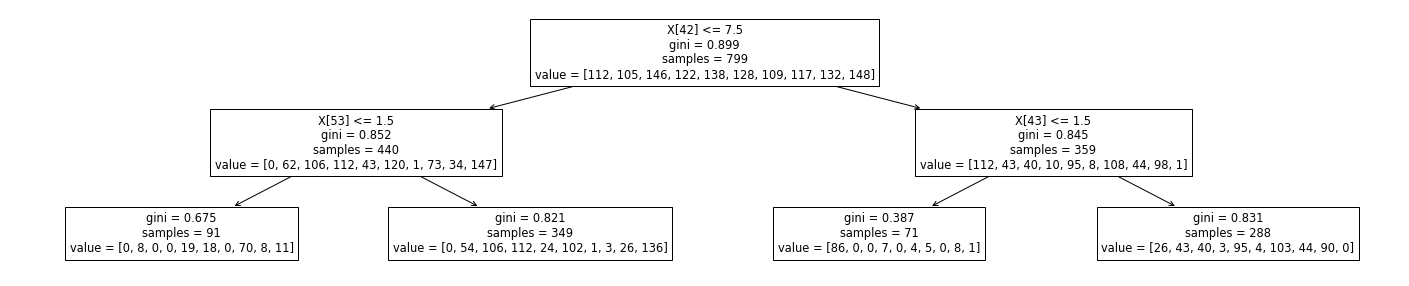

In [39]:
plt.figure(figsize=(25,5))
tree.plot_tree(rf1.estimators_[0])
plt.show()